In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
outfile = "run55-TRB-HUMAN-shared-clones.xlsx"
ptfile = "20240514-DataSheet-RUN55.csv"

## Read data

In [4]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Chain,Patient,SampleInfo,UMI,RACE,Group,HEK_cells,Constant,MID,Sample
0,N701_S502,BP2338-pre-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S1,...,TCRb,BP2338,pre-sort,yes,no,NaN,no,no,NaN,BP2338-pre-T_S1
1,N702_S502,BP2880-pre-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S2,...,TCRb,BP2880,pre-sort,yes,no,NaN,no,no,NaN,BP2880-pre-T_S2
2,N705_S502,BP2880-CD4pTc-T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S3,...,TCRb,BP2880,CD4+ T cells,yes,no,NaN,no,no,NaN,BP2880-CD4pTc-T_S3
3,N711_S502,pSpA-004-T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S4,...,TCRb,1123034,V4,yes,no,NaN,no,no,NaN,pSpA-004-T2_S4
4,N712_S502,pSpA-010-T2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S5,...,TCRb,1123006,V4,yes,no,NaN,no,no,NaN,pSpA-010-T2_S5


In [5]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones") and "TRB" in x]
myfiles.sort()
myfiles

['cdr3-clones-Block-TRB_HUMAN-after-reassignment.csv',
 'cdr3-clones-PreSpA-TRB_HUMAN-after-reassignment.csv',
 'cdr3-clones-Presynoviomics-TRB_HUMAN-after-reassignment.csv']

In [6]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,BP2234-CD4pTEM-T_S110,CSVRFHENTEAFFG,500
1,BP2234-CD4pTEM-T_S110,CSVETRRGSLPEQFFG,495
2,BP2234-CD4pTEM-T_S110,CSVAKGAPGDTQYFG,456
3,BP2234-CD4pTEM-T_S110,CSVSRALGDEQFFG,438
4,BP2234-CD4pTEM-T_S110,CSVAQLASSTDTQYFG,424


In [7]:
len(df['Sample'].unique())

70

In [8]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = pd.concat([df, df_tmp], ignore_index=True)
df.tail()

,Sample,cdr3pep,freq
2681362,Bx1799-ST-T2_S105,CSYGSYNEQFFG,1
2681363,Bx1799-ST-T2_S105,CTSSIQRTSGQGTQYFG,1
2681364,Bx1799-ST-T2_S105,CTSSPAGTQYFG,1
2681365,Bx1799-ST-T2_S105,CTSSQYRVTEAFFG,1
2681366,Bx1799-ST-T2_S105,CVSSPDSVVHEQYFG,1


In [9]:
len(df['Sample'].unique())

156

In [10]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Species,Chain,Patient,SampleInfo,UMI,RACE,Group,HEK_cells,Constant,MID
0,BP2234-CD4pTEM-T_S110,CSVRFHENTEAFFG,500,N706_S511,BP2234-CD4pTEM-T,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,BP2234,CD4+ TEMRA,yes,no,NaN,no,no,NaN
1,BP2234-CD4pTEM-T_S110,CSVETRRGSLPEQFFG,495,N706_S511,BP2234-CD4pTEM-T,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,BP2234,CD4+ TEMRA,yes,no,NaN,no,no,NaN
2,BP2234-CD4pTEM-T_S110,CSVAKGAPGDTQYFG,456,N706_S511,BP2234-CD4pTEM-T,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,BP2234,CD4+ TEMRA,yes,no,NaN,no,no,NaN
3,BP2234-CD4pTEM-T_S110,CSVSRALGDEQFFG,438,N706_S511,BP2234-CD4pTEM-T,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,BP2234,CD4+ TEMRA,yes,no,NaN,no,no,NaN
4,BP2234-CD4pTEM-T_S110,CSVAQLASSTDTQYFG,424,N706_S511,BP2234-CD4pTEM-T,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,BP2234,CD4+ TEMRA,yes,no,NaN,no,no,NaN


In [11]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,10040,BB5072-T2_S118,CAAADRSQETQYFG,21
1,10040,BB5072-T2_S118,CAAAGIANTGELFFG,25
2,10040,BB5072-T2_S118,CAAAKAVNQPQHFG,10
3,10040,BB5072-T2_S118,CAAFPGTESLVATNEKLFFG,1
4,10040,BB5072-T2_S118,CAAGGGAGNYGYTFG,27


In [12]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,BB3709-ST-T2_S162,229939
1,BB4064-ST-T2_S136,65957
2,BB4382-ST-T2_S160,313757
3,BB4554-ST-T2_S149,127752
4,BB4679-ST-T2_S114,243434


In [13]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,10040,BB5072-T2_S118,CAAADRSQETQYFG,21,436541
1,10040,BB5072-T2_S118,CAAAGIANTGELFFG,25,436541
2,10040,BB5072-T2_S118,CAAAKAVNQPQHFG,10,436541
3,10040,BB5072-T2_S118,CAAFPGTESLVATNEKLFFG,1,436541
4,10040,BB5072-T2_S118,CAAGGGAGNYGYTFG,27,436541


In [14]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
2681362,SPA010345,pSpA-141-T2_S71,CVTSRDSEGTGELFFG,1,319096
2681363,SPA010345,pSpA-141-T2_S71,CVTSRDSPHPTVPGEETQYFG,1,319096
2681364,SPA010345,pSpA-141-T2_S71,CVTSRDTNSNQPQHFG,1,319096
2681365,SPA010345,pSpA-141-T2_S71,CVTVTTGSPTSTDTQYFG,3,319096
2681366,SPA010345,pSpA-141-T2_S71,CVVDTQYFG,9,319096


In [15]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,10040,BB5072-T2_S118,CAAADRSQETQYFG,21,436541,0.004811
1,10040,BB5072-T2_S118,CAAAGIANTGELFFG,25,436541,0.005727
2,10040,BB5072-T2_S118,CAAAKAVNQPQHFG,10,436541,0.002291
3,10040,BB5072-T2_S118,CAAFPGTESLVATNEKLFFG,1,436541,0.000229
4,10040,BB5072-T2_S118,CAAGGGAGNYGYTFG,27,436541,0.006185


## Determine overlap (shared clones) and the direction

In [16]:
ids = list(df['Sample'].unique())
ids[:10]

['BB5072-T2_S118',
 'pSpA-048-T2_S22',
 'pSpA-027-T2_S9',
 'pSpA-037-T2_S19',
 'pSpA-040-T2_S20',
 'pSpA-010-T2_S5',
 'pSpA-028-T2_S10',
 'pSpA-015-T2_S6',
 'pSpA-020-T2_S7',
 'pSpA-081-T2_S38']

In [17]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [18]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,BB5072-T2_S118,pSpA-048-T2_S22,3.215506,2.475172
1,pSpA-027-T2_S9,BB5072-T2_S118,2.121028,1.975301
2,pSpA-037-T2_S19,BB5072-T2_S118,2.150645,1.275940
3,pSpA-040-T2_S20,BB5072-T2_S118,2.341713,2.177802
4,pSpA-010-T2_S5,BB5072-T2_S118,2.586618,2.218806


In [19]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,BB5072-T2_S118,pSpA-048-T2_S22,3.215506,2.475172,10040,1123001
1,pSpA-027-T2_S9,pSpA-048-T2_S22,3.806083,1.934774,1123003,1123001
2,pSpA-037-T2_S19,pSpA-048-T2_S22,3.954814,1.294911,1123003,1123001
3,pSpA-040-T2_S20,pSpA-048-T2_S22,28.572589,10.571849,1123005,1123001
4,pSpA-010-T2_S5,pSpA-048-T2_S22,3.675132,3.417461,1123006,1123001


In [20]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,9722,BB3709-ST-T2_S162,Bx1565-ST-T2_S102,78.105063,75.277806,BB3709,Bx1565
1,8430,BB5347-ST-T2_S147,Bx1752-ST-T2_S117,76.409433,75.098871,BB5347,Bx1752
2,8459,Bx1565-ST-T2_S102,Bx1752-ST-T2_S117,75.156601,75.036960,Bx1565,Bx1752
3,10240,Bx1565-ST-T2_S102,BB5347-ST-T2_S147,77.681164,75.001368,Bx1565,BB5347
4,8365,BB5347-ST-T2_S147,Bx1724-ST-T2_S133,79.429235,74.867063,BB5347,Bx1724


In [21]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,9722,BB3709-ST-T2_S162,Bx1565-ST-T2_S102,78.105063,75.277806,BB3709,Bx1565,different
1,8430,BB5347-ST-T2_S147,Bx1752-ST-T2_S117,76.409433,75.098871,BB5347,Bx1752,different
2,8459,Bx1565-ST-T2_S102,Bx1752-ST-T2_S117,75.156601,75.036960,Bx1565,Bx1752,different
3,10240,Bx1565-ST-T2_S102,BB5347-ST-T2_S147,77.681164,75.001368,Bx1565,BB5347,different
4,8365,BB5347-ST-T2_S147,Bx1724-ST-T2_S133,79.429235,74.867063,BB5347,Bx1724,different


In [22]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run55-TRB-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [23]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,9722,BB3709-ST-T2_S162,Bx1565-ST-T2_S102,78.105063,75.277806,BB3709,Bx1565,different
1,1,8430,BB5347-ST-T2_S147,Bx1752-ST-T2_S117,76.409433,75.098871,BB5347,Bx1752,different
2,2,8459,Bx1565-ST-T2_S102,Bx1752-ST-T2_S117,75.156601,75.036960,Bx1565,Bx1752,different
3,3,10240,Bx1565-ST-T2_S102,BB5347-ST-T2_S147,77.681164,75.001368,Bx1565,BB5347,different
4,4,8365,BB5347-ST-T2_S147,Bx1724-ST-T2_S133,79.429235,74.867063,BB5347,Bx1724,different


In [24]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [25]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,9722,BB3709-ST-T2_S162,Bx1565-ST-T2_S102,78.105063,75.277806,BB3709,Bx1565,different,BB3709-ST-T2_S162->Bx1565-ST-T2_S102,blue
1,1,8430,BB5347-ST-T2_S147,Bx1752-ST-T2_S117,76.409433,75.098871,BB5347,Bx1752,different,BB5347-ST-T2_S147->Bx1752-ST-T2_S117,blue
2,2,8459,Bx1565-ST-T2_S102,Bx1752-ST-T2_S117,75.156601,75.036960,Bx1565,Bx1752,different,Bx1565-ST-T2_S102->Bx1752-ST-T2_S117,blue
3,3,10240,Bx1565-ST-T2_S102,BB5347-ST-T2_S147,77.681164,75.001368,Bx1565,BB5347,different,Bx1565-ST-T2_S102->BB5347-ST-T2_S147,blue
4,4,8365,BB5347-ST-T2_S147,Bx1724-ST-T2_S133,79.429235,74.867063,BB5347,Bx1724,different,BB5347-ST-T2_S147->Bx1724-ST-T2_S133,blue


Wrote run55-TRB-HUMAN-shared-clones-all.pdf to disk


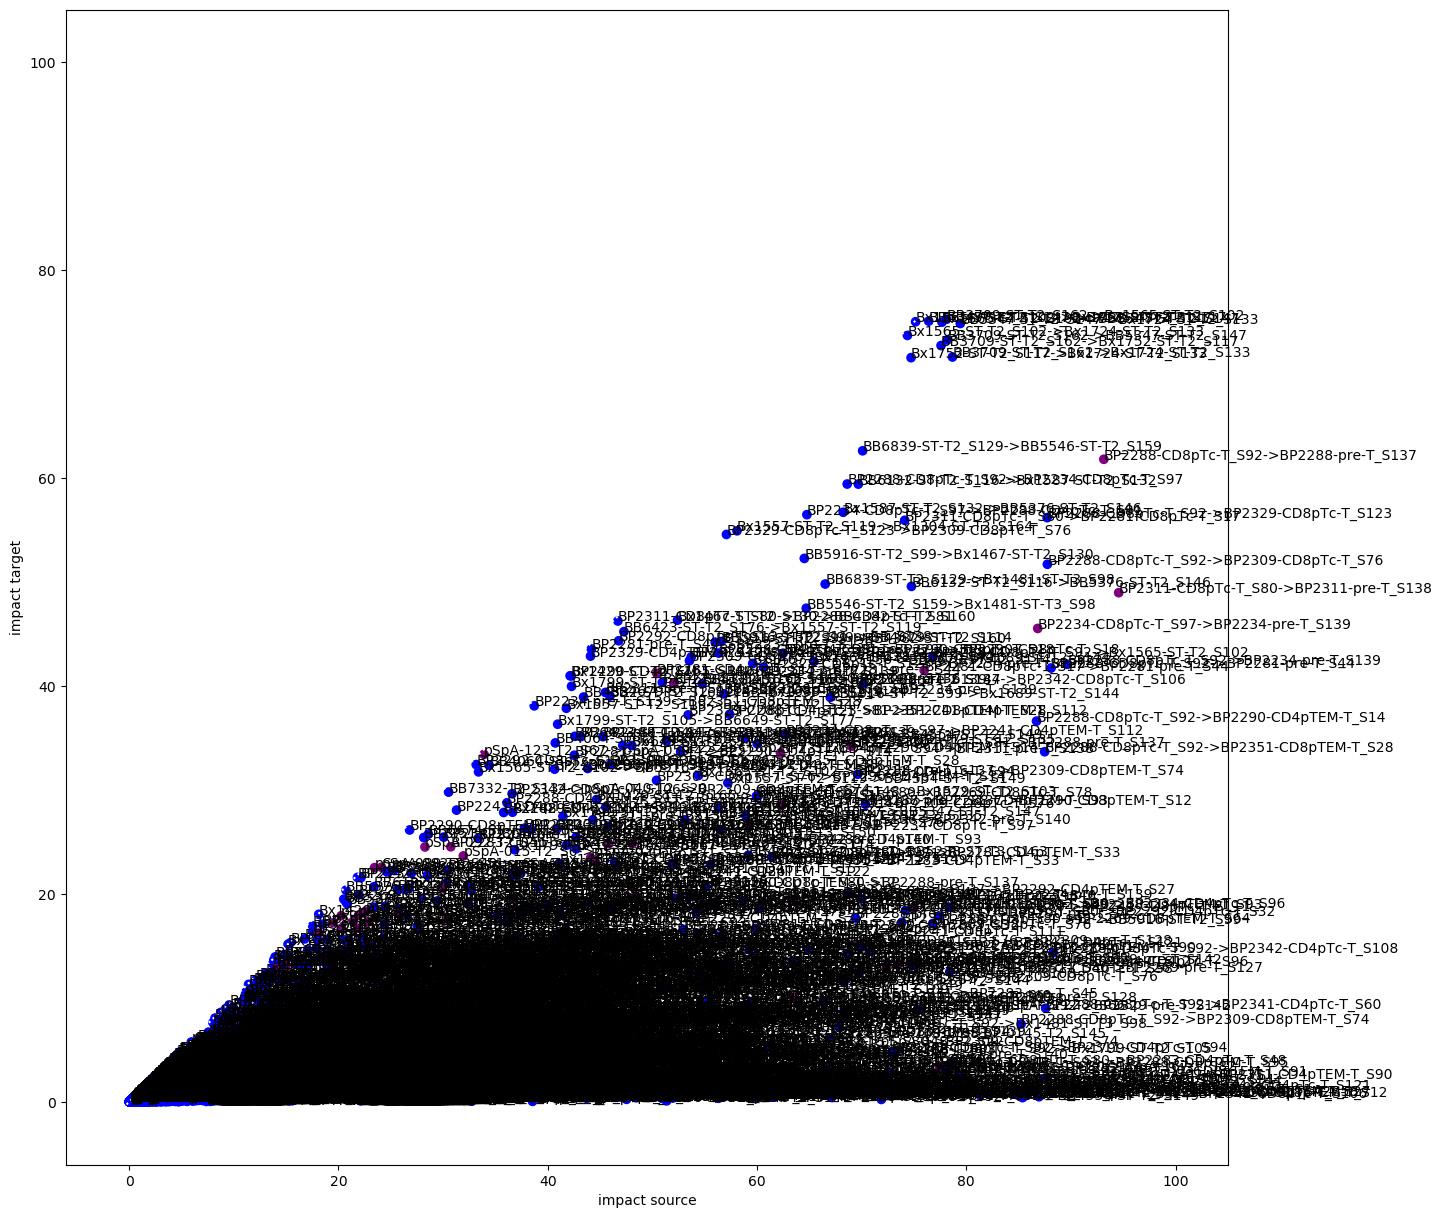

In [26]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [27]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,0,BB3709-ST-T2_S162,Bx1565-ST-T2_S102,78.105063,75.277806,different,BB3709-ST-T2_S162->Bx1565-ST-T2_S102,blue
1,1,BB5347-ST-T2_S147,Bx1752-ST-T2_S117,76.409433,75.098871,different,BB5347-ST-T2_S147->Bx1752-ST-T2_S117,blue
2,2,Bx1565-ST-T2_S102,Bx1752-ST-T2_S117,75.156601,75.036960,different,Bx1565-ST-T2_S102->Bx1752-ST-T2_S117,blue
3,3,Bx1565-ST-T2_S102,BB5347-ST-T2_S147,77.681164,75.001368,different,Bx1565-ST-T2_S102->BB5347-ST-T2_S147,blue
4,4,BB5347-ST-T2_S147,Bx1724-ST-T2_S133,79.429235,74.867063,different,BB5347-ST-T2_S147->Bx1724-ST-T2_S133,blue


Wrote run55-TRB-HUMAN-shared-clones-different-ids.pdf to disk


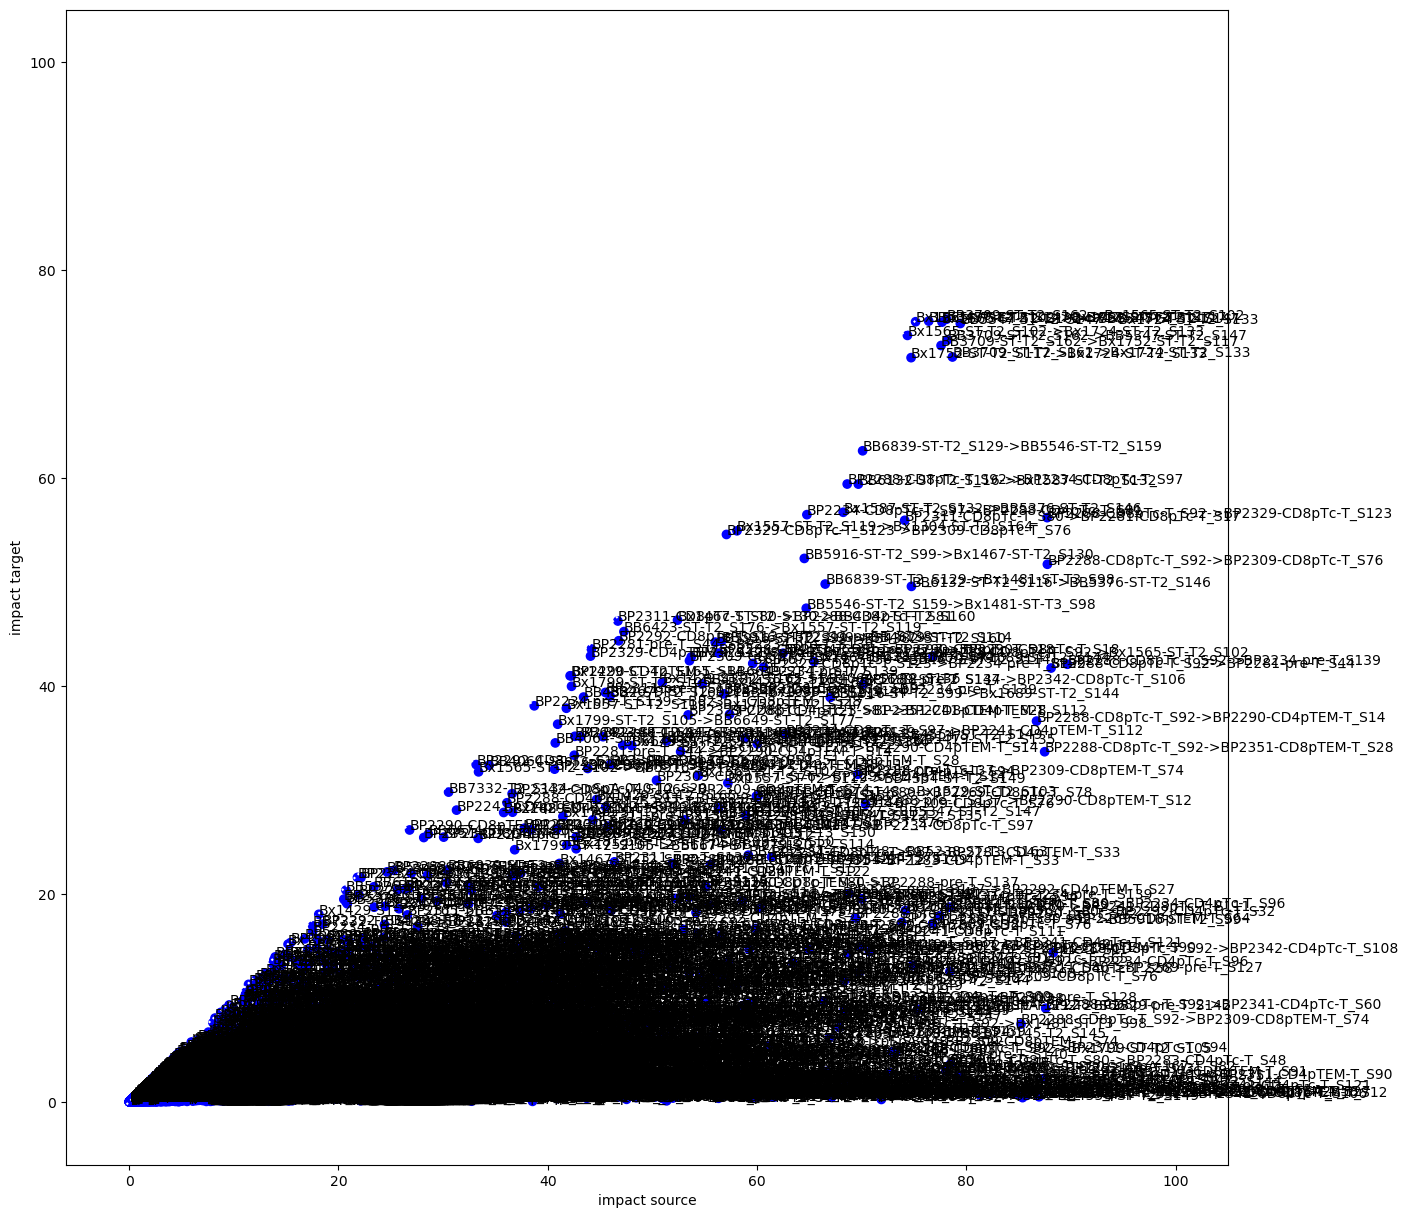

In [28]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [29]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,10040,BB5072-T2_S118,CAAADRSQETQYFG,21,436541,0.004811
1,10040,BB5072-T2_S118,CAAAGIANTGELFFG,25,436541,0.005727
2,10040,BB5072-T2_S118,CAAAKAVNQPQHFG,10,436541,0.002291
3,10040,BB5072-T2_S118,CAAFPGTESLVATNEKLFFG,1,436541,0.000229
4,10040,BB5072-T2_S118,CAAGGGAGNYGYTFG,27,436541,0.006185


In [30]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [31]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient                   Sample  \
               nunique       <lambda_0> nunique   
cdr3pep                                           
CAAAADNTIYFG         1            60040       1   
CAAAADSTIYFG         1            60040       1   
CAAAAGGADTQYFG       1           BP2269       1   
CAAAAGRNQPQHFG       2  BP2241, 1123086       2   
CAAAAPGTQYFG         2  1123006, Bx1689       2   

                                                    
                                        <lambda_0>  
cdr3pep                                             
CAAAADNTIYFG                        BB7353-T2_S113  
CAAAADSTIYFG                        BB7353-T2_S113  
CAAAAGGADTQYFG                   BP2269-pre-T_S127  
CAAAAGRNQPQHFG  pSpA-055-T2_S24, BP2241-pre-T_S141  
CAAAAPGTQYFG     Bx1689-ST-T2_S144, pSpA-010-T2_S5

In [32]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient         cdr3pep          10040         1123001        1123003  \
Sample                  BB5072-T2_S118 pSpA-048-T2_S22 pSpA-027-T2_S9   
0          CAAAADNTIYFG            NaN             NaN            NaN   
1          CAAAADSTIYFG            NaN             NaN            NaN   
2        CAAAAGGADTQYFG            NaN             NaN            NaN   
3        CAAAAGRNQPQHFG            NaN             NaN            NaN   
4          CAAAAPGTQYFG            NaN             NaN            NaN   

Patient                         1123005        1123006                  \
Sample  pSpA-037-T2_S19 pSpA-040-T2_S20 pSpA-010-T2_S5 pSpA-028-T2_S10   
0                   NaN             NaN            NaN             NaN   
1                   NaN             NaN            NaN             NaN   
2                   NaN             NaN            NaN             NaN   
3                   NaN             NaN            NaN             NaN   
4                   NaN             NaN       0.005711             NaN   

Patient        1123007                 ...      SPA010137      SPA010199  \
Sample  pSpA-015-T2_S6 pSpA-020-T2_S7  ... pSpA-167-T_S82 pSpA-176-T_S88   
0                  NaN            NaN  ...            NaN            NaN   
1                  NaN            NaN  ...            NaN            NaN   
2                  NaN            NaN  ...            NaN            NaN   
3                  NaN            NaN  ...            NaN            NaN   
4                  NaN            NaN  ...            NaN            NaN   

Patient       SPA010255       SPA010265        SPA010291       SPA010304  \
Sample  pSpA-164-T2_S73 pSpA-139-T2_S70 pSpA-179-T2_S100 pSpA-135-T2_S69   
0                   NaN             NaN              NaN             NaN   
1                   NaN             NaN              NaN             NaN   
2                   NaN             NaN              NaN             NaN   
3                   NaN             NaN              NaN             NaN   
4                   NaN             NaN              NaN             NaN   

Patient       SPA010305        SPA010310      SPA010332       SPA010345  
Sample  pSpA-150-T2_S72 pSpA-180-T2_S101 pSpA-178-T_S89 pSpA-141-T2_S71  
0                   NaN              NaN            NaN             NaN  
1                   NaN              NaN            NaN             NaN  
2                   NaN              NaN            NaN             NaN  
3                   NaN              NaN            NaN             NaN  
4                   NaN              NaN            NaN             NaN  

[5 rows x 157 columns]

In [ ]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/tmp/ipykernel_55867/2505862536.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')


In [ ]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

In [ ]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")